In [75]:
from tsfresh import extract_features, extract_relevant_features
import pandas as pd
import numpy as np
import pickle
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [1]:
frames = []
counter = 0
for file in tqdm(os.listdir('E:/lightcurves/')):
    filepath = 'E:/lightcurves/' + file
    with open(filepath,'rb') as rfile:
        lc = pickle.load(rfile)
    frames.append(pd.DataFrame({'id':counter*np.ones(len(lc.flux)),'time':lc.time,'flux':lc.flux}))
    counter = counter + 1
timeseries = pd.concat(frames)
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

C:\Users\811261\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
  0%|                                                                                        | 0/15767 [00:00<?, ?it/s]C:\Users\811261\AppData\Local\Continuum\anaconda3\lib\site-packages\astropy\config\configuration.py:557: ConfigurationMissingWarning: Configuration defaults will be used due to FileNotFoundError:2 on None
  warn(ConfigurationMissingWarning(msg))
100%|███████████████████████████████████████████████████████████████████████████| 15767/15767 [01:52<00:00, 140.18it/s]


In [87]:
extracted_features = pd.read_csv('E:/catalogues/features.csv')
x = np.zeros((len(extracted_features),764))

for n in range(1,len(extracted_features)-1):
    x[n] = extracted_features[n:n+1].to_numpy()[0]

newx = SelectKBest(f_classif, k=200).fit_transform(x_train, y_train)
print(newx.shape)
    
newy = np.zeros(len(y))
for i in range(len(y)):
    newy[i] = np.where(y[i]==1)[0][0]
x_train, x_test, y_train, y_test = train_test_split(x, newy, test_size=0.2, random_state=42)

(12613, 200)


C:\Users\811261\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [427 650 651 652 653 654 655 656 657 658 659 660 661 662 663 712 735 758
 760] are constant.
  UserWarning)
C:\Users\811261\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [90]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(len(np.where(y_pred==y_test)[0])/len(y_test))

0.18199112238427395


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 600)               459000    
_________________________________________________________________
dense_58 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_59 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_60 (Dense)             (None, 6)                 1206      
Total params: 780,806
Trainable params: 780,806
Non-trainable params: 0
_________________________________________________________________
Train on 12613 samples, validate on 3154 samples
Epoch 1/100
12613/12613 [==============================] - 1s 52us/sample - loss: 16067167.9585 - categorical_accuracy: 0.2108 - val_loss: 53555603636.9882 - val_categorical_accuracy: 0.2048
Epoch

Epoch 39/100
12613/12613 [==============================] - 0s 32us/sample - loss: 10359032.9132 - categorical_accuracy: 0.2157 - val_loss: 44853736115.9110 - val_categorical_accuracy: 0.2181
Epoch 40/100
12613/12613 [==============================] - 0s 29us/sample - loss: 10208034.7537 - categorical_accuracy: 0.2163 - val_loss: 44603948360.4373 - val_categorical_accuracy: 0.2185
Epoch 41/100
12613/12613 [==============================] - 0s 31us/sample - loss: 10065523.3166 - categorical_accuracy: 0.2162 - val_loss: 44660159691.1294 - val_categorical_accuracy: 0.2185
Epoch 42/100
12613/12613 [==============================] - 0s 30us/sample - loss: 9932755.2750 - categorical_accuracy: 0.2167 - val_loss: 44577928656.0229 - val_categorical_accuracy: 0.2200
Epoch 43/100
12613/12613 [==============================] - 0s 30us/sample - loss: 9779395.3050 - categorical_accuracy: 0.2167 - val_loss: 44177518310.8816 - val_categorical_accuracy: 0.2204
Epoch 44/100
12613/12613 [================

Epoch 82/100
12613/12613 [==============================] - 0s 34us/sample - loss: 5080838.5080 - categorical_accuracy: 0.2162 - val_loss: 39166173308.0367 - val_categorical_accuracy: 0.2131
Epoch 83/100
12613/12613 [==============================] - 0s 34us/sample - loss: 4990459.1967 - categorical_accuracy: 0.2148 - val_loss: 39198421100.7466 - val_categorical_accuracy: 0.2137
Epoch 84/100
12613/12613 [==============================] - 0s 32us/sample - loss: 4859616.9263 - categorical_accuracy: 0.2138 - val_loss: 38903031359.7822 - val_categorical_accuracy: 0.2140
Epoch 85/100
12613/12613 [==============================] - 0s 31us/sample - loss: 4776698.7524 - categorical_accuracy: 0.2136 - val_loss: 38950863092.6679 - val_categorical_accuracy: 0.2137
Epoch 86/100
12613/12613 [==============================] - 0s 30us/sample - loss: 4648253.0435 - categorical_accuracy: 0.2130 - val_loss: 38711114751.1907 - val_categorical_accuracy: 0.2137
Epoch 87/100
12613/12613 [===================

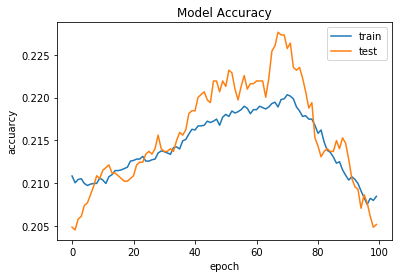

In [36]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

y = np.load("E:/y_cl.npy")
model = Sequential()
model.add(Dense(units=600,input_shape=(764,)))
model.add(Dense(units=400))
model.add(Dense(units=200))
model.add(Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.0000001)
model.compile(loss = "categorical_crossentropy", metrics=['categorical_accuracy'], optimizer = opt)
model.summary()

history = model.fit(x, y, epochs=100, verbose=1,batch_size=128, validation_split=0.2, shuffle=True)

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuarcy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

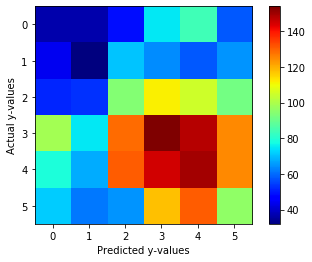

In [89]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm,cmap='jet')
plt.xlabel('Predicted y-values')
plt.ylabel('Actual y-values')
plt.colorbar()
plt.show()

In [66]:
x_train[0]

array([ 1.12740000e+04,  3.90423619e+01,  2.23582576e+02,  5.79304700e-03,
       -2.57825556e-03,  9.65498609e-04,  3.44877817e-01, -8.87653486e-03,
       -3.09626128e-01,  4.00776528e-02,  5.92608745e-01, -8.84028879e-03,
       -4.48582099e-01,  4.41607100e-02,  2.50993898e-01, -8.95745579e-03,
       -2.36670887e-01,  3.52521187e-02, -1.28250827e-01,  8.86052076e-02,
        9.51736553e-02, -1.89120367e-01, -4.57412245e-01,  1.94470626e-01,
        2.70896159e-01, -5.22330278e-01, -6.05377101e-02,  6.29409985e-02,
        9.05971221e-02, -1.23889442e-01, -6.12185818e-04,  1.94796853e-04,
        3.48650086e-04, -1.10618294e-04, -9.74989542e-03,  1.08562161e-03,
        3.97103005e-03, -7.20861134e-04, -1.52071946e-04,  9.77190408e-05,
        1.99559029e-04, -4.76921471e-05,  4.75777715e-04,  2.20086583e-04,
        3.66504695e-04,  5.77247636e-05,  4.34852100e-03,  1.25625006e-03,
        3.23722773e-03,  2.69990143e-04,  1.77300864e-04,  1.09564186e-04,
        1.55114472e-04,  








  0%|                                                                                           | 0/52 [00:00<?, ?it/s]C:\Users\811261\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  # This is added back by InteractiveShellApp.init_path()







  4%|███▏                                                                               | 2/52 [00:02<00:54,  1.09s/it]






  6%|████▊                                                                              | 3/52 [00:04<01:04,  1.31s/it]






  8%|██████▍                                                                            | 4/52 [00:05<01:10,  1.47s/it]






 10%|███████▉                                                                           | 5/52 [00:07<01:14,  1.58s/it]






 12%|█████████▌                                                                        

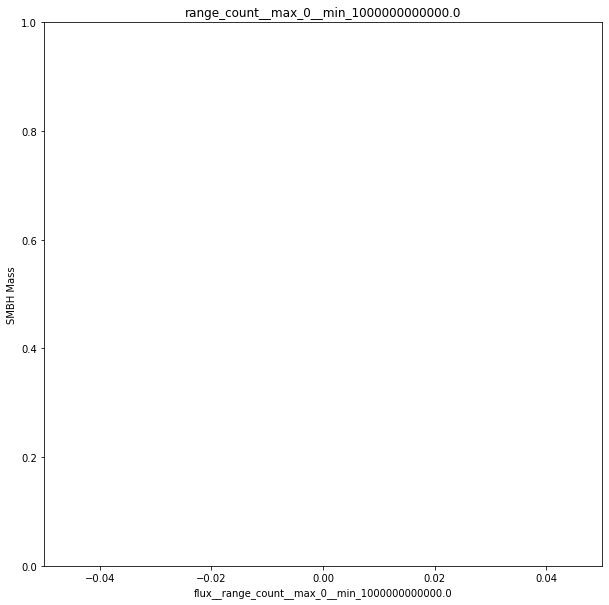

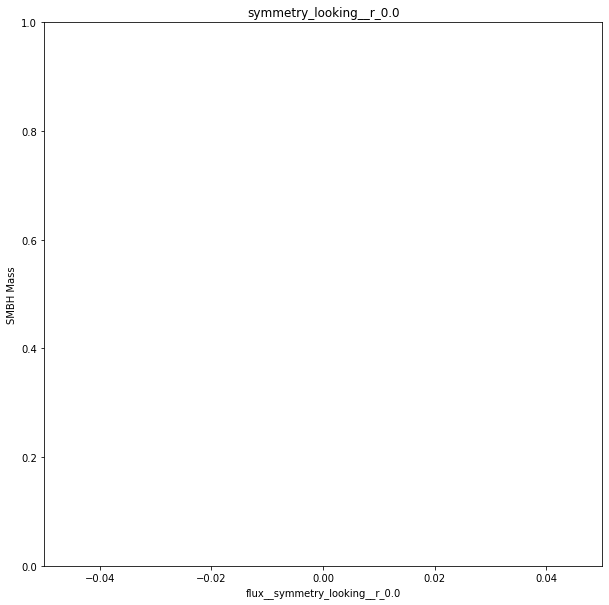

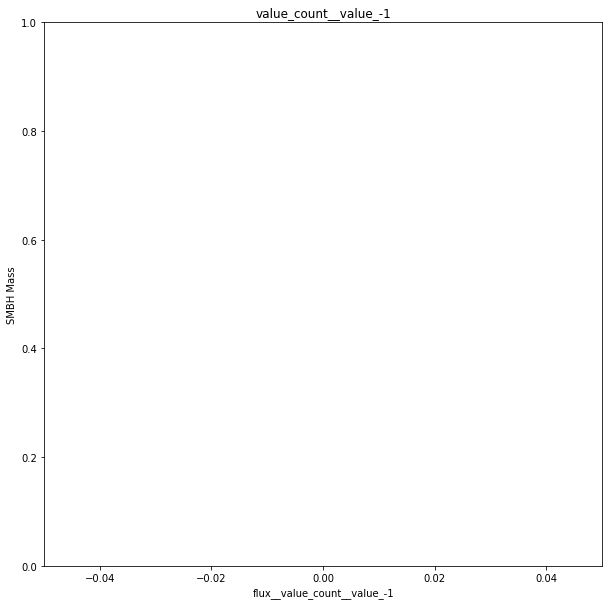

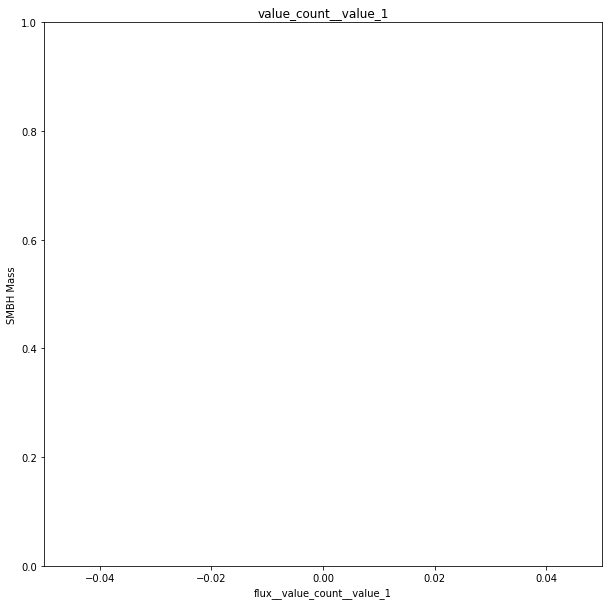

In [36]:
from scipy.stats import gaussian_kde
for n in tqdm(range(428+242+42,len(extracted_features.columns))):
    try:
        fig = plt.figure(figsize=(10,10))

        plt.title(extracted_features.columns[n][6:])
        plt.xlabel(extracted_features.columns[n])
        plt.ylabel("SMBH Mass")

        stdev = 0.1*np.std(x_train[:,n])
        plt.xlim(np.percentile(x_train[:,n],5)-stdev,np.percentile(x_train[:,n]+stdev,95))

        xy = np.vstack([x_train[:,n],y_train])
        z = gaussian_kde(xy)(xy)
        plt.scatter(x_train[:,n],y_train,c=z,s=1,cmap='jet')
        plt.savefig('E:/corrs/'+str(n)+'.jpg')
        plt.close()
    except:
        pass

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(np.abs(extracted_features.to_numpy()),y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(extracted_features.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                              Specs         Score
755  flux__time_reversal_asymmetry_statistic__lag_1  5.939432e+15
756  flux__time_reversal_asymmetry_statistic__lag_2  3.873559e+15
757  flux__time_reversal_asymmetry_statistic__lag_3  2.617784e+15
84                                  flux__c3__lag_1  1.975002e+15
85                                  flux__c3__lag_2  4.370253e+14
86                                  flux__c3__lag_3  1.332512e+14
1                                  flux__abs_energy  1.198094e+13
728               flux__spkt_welch_density__coeff_2  1.352696e+11
729               flux__spkt_welch_density__coeff_5  1.308834e+11
730               flux__spkt_welch_density__coeff_8  1.233989e+11


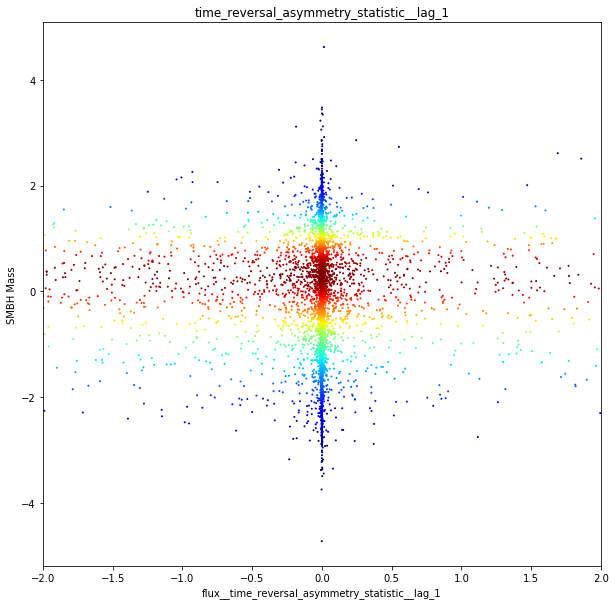

In [57]:
n = 755
fig = plt.figure(figsize=(10,10))

plt.title(extracted_features.columns[n][6:])
plt.xlabel(extracted_features.columns[n])
plt.ylabel("SMBH Mass")

stdev = 0*np.std(x_train[:,n])
plt.xlim(-2,2)

xy = np.vstack([x_train[:,n],y_train])
z = gaussian_kde(xy)(xy)
plt.scatter(x_train[:,n],y_train,c=z,s=1,cmap='jet')

In [72]:
i = 2
np.where(y[i]==1)[0][0]

2

In [69]:
y[2]

-0.43357850110005697